In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("/content/household_power_consumption.csv")

In [3]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16-12-2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,16-12-2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,16-12-2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,16-12-2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,16-12-2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [4]:
df.isna().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Date                   1048575 non-null  object 
 1   Time                   1048575 non-null  object 
 2   Global_active_power    1048575 non-null  object 
 3   Global_reactive_power  1048575 non-null  object 
 4   Voltage                1048575 non-null  object 
 5   Global_intensity       1048575 non-null  object 
 6   Sub_metering_1         1048575 non-null  object 
 7   Sub_metering_2         1048575 non-null  object 
 8   Sub_metering_3         1044506 non-null  float64
dtypes: float64(1), object(8)
memory usage: 72.0+ MB


In [6]:
df.drop(["Date","Time"], axis=1, inplace=True)

In [7]:
df["Global_active_power"].value_counts()

0.218    6714
0.216    6575
0.22     6410
0.222    6198
0.224    6052
         ... 
7.626       1
7.306       1
7.11        1
6.988       1
7.38        1
Name: Global_active_power, Length: 4076, dtype: int64

In [8]:
df["Global_reactive_power"].replace("?",np.nan,inplace=True)
df["Global_active_power"].replace("?",np.nan,inplace=True)
df["Voltage"].replace("?",np.nan,inplace=True)
df["Global_intensity"].replace("?",np.nan,inplace=True)
df["Sub_metering_1"].replace("?",np.nan,inplace=True)
df["Sub_metering_2"].replace("?",np.nan,inplace=True)

In [9]:
df.iloc[:,:-1] = df.iloc[:,:-1].astype("float64")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Global_active_power    1044506 non-null  float64
 1   Global_reactive_power  1044506 non-null  float64
 2   Voltage                1044506 non-null  float64
 3   Global_intensity       1044506 non-null  float64
 4   Sub_metering_1         1044506 non-null  float64
 5   Sub_metering_2         1044506 non-null  float64
 6   Sub_metering_3         1044506 non-null  float64
dtypes: float64(7)
memory usage: 56.0 MB


In [11]:
df.dropna(how="any",subset=["Sub_metering_3", "Global_intensity", "Sub_metering_2", "Sub_metering_1"], axis=0, inplace=True)

In [12]:
df.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [13]:
x = df.drop(["Voltage"],axis=1)
y = df["Voltage"]

In [14]:
x

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,18.4,0.0,1.0,17.0
1,5.360,0.436,23.0,0.0,1.0,16.0
2,5.374,0.498,23.0,0.0,2.0,17.0
3,5.388,0.502,23.0,0.0,1.0,17.0
4,3.666,0.528,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...
1048570,0.426,0.076,1.8,0.0,0.0,0.0
1048571,0.424,0.076,1.8,0.0,0.0,0.0
1048572,0.422,0.076,1.8,0.0,0.0,0.0
1048573,0.422,0.078,1.8,0.0,0.0,0.0


In [15]:
y

0          234.84
1          233.63
2          233.29
3          233.74
4          235.68
            ...  
1048570    242.27
1048571    242.10
1048572    241.73
1048573    242.56
1048574    242.61
Name: Voltage, Length: 1044506, dtype: float64

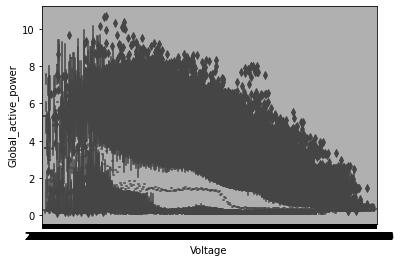

In [16]:
sns.boxplot(data=df, y="Global_active_power",x="Voltage")
plt.grid()

In [17]:
pd.concat([x,y], axis=1).corr()["Voltage"].sort_values()

Global_intensity        -0.411298
Global_active_power     -0.400987
Sub_metering_3          -0.284932
Sub_metering_1          -0.203805
Sub_metering_2          -0.178899
Global_reactive_power   -0.120617
Voltage                  1.000000
Name: Voltage, dtype: float64

In [18]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x.iloc[:,:] = std.fit_transform(x.iloc[:,:])
x

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.751371,2.737077,2.872180,-0.186271,-0.074799,1.347824
1,3.764168,2.901452,3.837839,-0.186271,-0.074799,1.226027
2,3.776562,3.467630,3.837839,-0.186271,0.082614,1.347824
3,3.788957,3.504158,3.837839,-0.186271,-0.074799,1.347824
4,2.264449,3.741587,2.326373,-0.186271,-0.074799,1.347824
...,...,...,...,...,...,...
1048570,-0.603962,-0.386035,-0.612590,-0.186271,-0.232213,-0.722723
1048571,-0.605732,-0.386035,-0.612590,-0.186271,-0.232213,-0.722723
1048572,-0.607503,-0.386035,-0.612590,-0.186271,-0.232213,-0.722723
1048573,-0.607503,-0.367771,-0.612590,-0.186271,-0.232213,-0.722723


In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=1)

In [20]:
ann = Sequential()

ann.add(Dense(units=10, activation="relu"))
ann.add(Dense(units=1))

ann.compile(optimizer="adam", loss="mse")

ann.fit(xtrain,ytrain,batch_size=38,epochs=15)

ypred = ann.predict(xtest)

Epoch 1/15
19241/19241 [==============================] - 33s 2ms/step - loss: 5592.4902
Epoch 2/15
19241/19241 [==============================] - 30s 2ms/step - loss: 11.7114
Epoch 3/15
19241/19241 [==============================] - 29s 2ms/step - loss: 8.0385
Epoch 4/15
19241/19241 [==============================] - 31s 2ms/step - loss: 7.8314
Epoch 5/15
19241/19241 [==============================] - 29s 2ms/step - loss: 7.7838
Epoch 6/15
19241/19241 [==============================] - 29s 2ms/step - loss: 7.7474
Epoch 7/15
19241/19241 [==============================] - 29s 2ms/step - loss: 7.6936
Epoch 8/15
19241/19241 [==============================] - 29s 2ms/step - loss: 7.6500
Epoch 9/15
19241/19241 [==============================] - 30s 2ms/step - loss: 7.6245
Epoch 10/15
19241/19241 [==============================] - 29s 2ms/step - loss: 7.6007
Epoch 11/15
19241/19241 [==============================] - 29s 2ms/step - loss: 7.5869
Epoch 12/15
19241/19241 [=======================

In [21]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"MSE:{mean_squared_error(ytest,ypred)}")
print(f"RMSE:{np.sqrt(mean_squared_error(ytest,ypred))}")

MSE:7.472257693261996
RMSE:2.733543065924149
